In [21]:
import imutils
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import json

import cv2
import numpy

In [22]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [23]:
j = json.load(open("OnlineChallenge/GroundTruth/GroundTruth_All_388_Images.json"))

In [24]:
j

{'General': {'ExperimentInfo': 'This dataset contains references to images and measured data on a lettuce crop growing in well controlled greenhouse conditions. There are 4 varieties and samples of the crop are destructively measured in a 7 days interval.',
  'Varieties': 'Aphylion, Salanova, Satine, Lugano',
  'Measurements': {'RGBImage': {'Info': 'Reference to a png-file with the rgb-image data',
    'Unit': '-'},
   'DebthInformation': {'Info': 'Reference to a file (with png-extension) that holds xyz-information for each pixel from the top view',
    'Unit': '-'},
   'FreshWeightShoot': {'Info': "A head of lettuce, harvested from a hydroponic cultivation system has two parts, the 'root' and the 'shoot' The 'shoot' is the top part, being the edable part of the plant, starting at the attachment point of the first leaves",
    'Unit': 'gram/plant'},
   'Height': {'Info': 'The height of the highest part of the plant, measured from the attachment point of the first leaves.',
    'Unit': 

In [25]:
measurements_dict = j["Measurements"]

In [26]:
images = []

for key,value in measurements_dict.items():
    measurement = value
    measurement["KeyName"] = key
    images.append(measurement)

pprint(images)

[{'Depth_Information': 'Depth_27.png',
  'Diameter': 11.0,
  'DryWeightShoot': 0.42,
  'FreshWeightShoot': 5.5,
  'Height': 9.0,
  'KeyName': 'Image27',
  'LeafArea': 153.9,
  'RGB_Image': 'RGB_27.png',
  'Variety': 'Lugano'},
 {'Depth_Information': 'Depth_79.png',
  'Diameter': 20.2,
  'DryWeightShoot': 1.92,
  'FreshWeightShoot': 30.3,
  'Height': 8.8,
  'KeyName': 'Image79',
  'LeafArea': 582.3,
  'RGB_Image': 'RGB_79.png',
  'Variety': 'Lugano'},
 {'Depth_Information': 'Depth_140.png',
  'Diameter': 19.0,
  'DryWeightShoot': 2.83,
  'FreshWeightShoot': 60.9,
  'Height': 11.6,
  'KeyName': 'Image140',
  'LeafArea': 960.6,
  'RGB_Image': 'RGB_140.png',
  'Variety': 'Lugano'},
 {'Depth_Information': 'Depth_203.png',
  'Diameter': 22.0,
  'DryWeightShoot': 5.76,
  'FreshWeightShoot': 112.0,
  'Height': 11.0,
  'KeyName': 'Image203',
  'LeafArea': 1614.9,
  'RGB_Image': 'RGB_203.png',
  'Variety': 'Lugano'},
 {'Depth_Information': 'Depth_292.png',
  'Diameter': 32.0,
  'DryWeightShoot':

In [27]:
imgdf = df = pd.DataFrame(images)

In [28]:
imgdf.head()

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,KeyName
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9,Image27
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3,Image79
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6,Image140
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9,Image203
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6,Image292


In [29]:
diameter_column = imgdf["Diameter"]
leafarea_column = imgdf["LeafArea"]

In [30]:
diameter_column.corr(leafarea_column,method="pearson")

0.8755586877657757

In [31]:
diameter_column.corr(leafarea_column,method="spearman")

0.9011416298230617

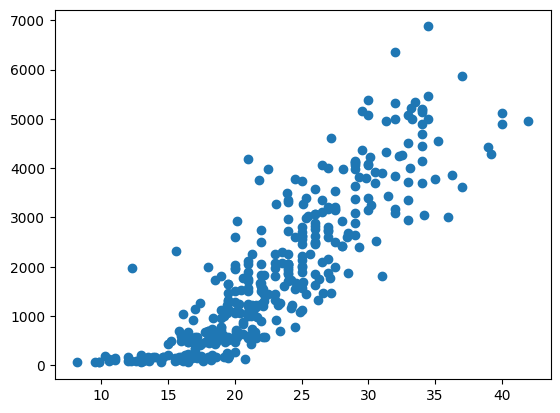

In [32]:
plt.scatter(
    diameter_column, # x
    leafarea_column  # y
)
plt.show()

# Color images

## Get most dominant colors in image

In [33]:
def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

## Average color for whole image

In [34]:
def get_avg_color(img_path):
    try:
        # base = "OnlineChallenge/RGBImages"
        img_path = base + img_path
        myimg = cv2.imread(img_path)
        avg_color_per_row = numpy.average(myimg, axis=0)
        avg_color = numpy.average(avg_color_per_row, axis=0)
        return avg_color
    except:
        return None

In [35]:
df["avg_color"] = df["RGB_Image"].apply(get_avg_color)

In [36]:
df["avg_color"]

0      [107.42220293209859, 119.9787958140433, 126.61...
1      [105.4232725694445, 118.1002377507716, 125.092...
2      [96.77387924382721, 111.07659866898163, 116.79...
3      [110.33289930555571, 123.8998167438271, 128.81...
4      [89.47033371913584, 118.00242814429002, 133.70...
                             ...                        
383    [110.68492476851866, 122.97215422453719, 130.1...
384    [107.78816695601836, 119.47894868827153, 125.7...
385    [116.30184654706798, 126.61695891203674, 133.3...
386    [89.00631462191349, 116.12345437885817, 132.57...
387    [105.58019820601847, 125.31097511574075, 133.0...
Name: avg_color, Length: 388, dtype: object

In [37]:
df.dropna()

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,KeyName,avg_color
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9,Image27,"[107.42220293209859, 119.9787958140433, 126.61..."
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3,Image79,"[105.4232725694445, 118.1002377507716, 125.092..."
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6,Image140,"[96.77387924382721, 111.07659866898163, 116.79..."
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9,Image203,"[110.33289930555571, 123.8998167438271, 128.81..."
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6,Image292,"[89.47033371913584, 118.00242814429002, 133.70..."
...,...,...,...,...,...,...,...,...,...,...
383,Salanova,RGB_252.png,Depth_252.png,128.7,7.18,12.9,28.4,2593.7,Image252,"[110.68492476851866, 122.97215422453719, 130.1..."
384,Salanova,RGB_314.png,Depth_314.png,167.7,7.80,15.0,28.0,2918.4,Image314,"[107.78816695601836, 119.47894868827153, 125.7..."
385,Salanova,RGB_316.png,Depth_316.png,220.9,12.13,15.0,29.0,3986.3,Image316,"[116.30184654706798, 126.61695891203674, 133.3..."
386,Salanova,RGB_321.png,Depth_321.png,216.6,11.55,16.0,34.0,4143.9,Image321,"[89.00631462191349, 116.12345437885817, 132.57..."


In [38]:
# def corrs(a_,b_):
#     a = df[a_]
#     b = df[b_]
#
#     a = a.dropna(axis=0, how='any')
#
#     p = a.corr(b,method="pearson")
#     s = a.corr(b,method="spearman")
#
#     print(p)
#     print(s)
#
#
#
#     plt.scatter(
#     a, # x
#     b  # y
#     )
#     plt.show()
#
# corrs("avg_color","Diameter")


In [39]:
cleaned = pd.Series([sum(avg) for avg in df["avg_color"].dropna(axis=0, how='any')])
print(cleaned)

0      354.018875
1      348.616203
2      324.645954
3      363.048445
4      341.182029
          ...    
382    363.809754
383    353.032965
384    376.290271
385    337.699811
386    363.931512
Length: 387, dtype: float64


In [40]:
diameter_column.corr(cleaned,method="pearson")

-0.11167367260294175

In [41]:
diameter_column.corr(cleaned,method="spearman")

-0.1186805653675764

In [42]:
leafarea_column.corr(cleaned,method="pearson")

-0.05934528878858902

In [43]:
leafarea_column.corr(cleaned,method="spearman")

-0.12699032663960397

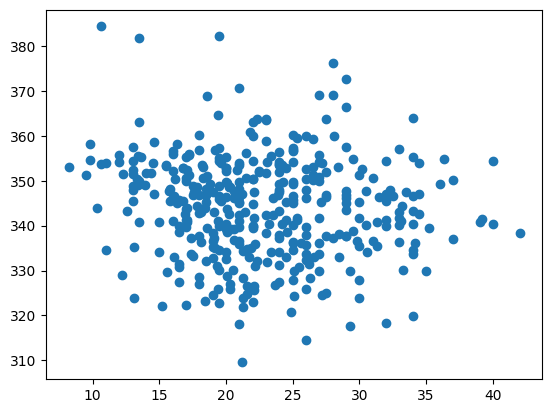

In [44]:
plt.scatter(
    diameter_column[:-1], # x
    cleaned  # y
    )
plt.show()

## Average color for dominant

In [45]:
from sklearn.cluster import KMeans


def get_dominant_colors_for_img(img_path=None, img=None, clusters=3, top_colors=3):
	assert clusters >= top_colors
	# top_colors = clusters
	if img is None:img = cv2.imread(img_path)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	img = img.reshape((img.shape[0] * img.shape[1], 3))
	clt = KMeans(n_clusters=clusters)
	clt.fit(img)
	dominant_colors = clt.cluster_centers_
	dominant_colors = sorted(dominant_colors,
	       key=lambda color: abs(color[0] - color[1]) + abs(color[1] - color[2]) + abs(color[2] - color[0]),
	       reverse=True)
	return dominant_colors[:top_colors]

def crop_around_center(image, width, height, left=0.5, right=0.5):
	image_size = (image.shape[1], image.shape[0])
	image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

	x = int(image_center[0] - width * left)
	y = int(image_center[1] - height * right)
	return image[y:y + height, x:x + width]

def get_average_color(colors):
		avg_color = tuple(map(lambda x: int(x), sum(colors) / len(colors)))
		avg_color = tuple(map(lambda x: int(x), avg_color))
		return avg_color

def from_rgb(rgb):
	r, g, b = rgb
	r, g, b = int(r), int(g), int(b)
	return f'#{r:02x}{g:02x}{b:02x}'

In [49]:
count = 0
def average_color_dominant(path):
	global count
	count += 1
	try:
		print(f"Calculating average color of dominants: {count}")
		path = base + path
		cropped_img = crop_around_center(
				cv2.imread(path),
				width=400,
				height=360,
				left=0,
				right=0.5)
		dominant_colors = get_dominant_colors_for_img(img=cropped_img, clusters=10, top_colors=3)

		# color = from_rgb(color)
		# color2 = int(color[1:], 16)

		average_color = get_average_color(dominant_colors)
		return average_color
	except:
		print(f"Exceeption while alculating average color of dominants: {count}")
		return None





df["avg_color_dominant"] = df["RGB_Image"].apply(average_color_dominant)




Calculating average color of dominants: 1
Calculating average color of dominants: 2
Calculating average color of dominants: 3
Calculating average color of dominants: 4
Calculating average color of dominants: 5
Calculating average color of dominants: 6
Calculating average color of dominants: 7
Calculating average color of dominants: 8
Calculating average color of dominants: 9
Calculating average color of dominants: 10
Calculating average color of dominants: 11
Calculating average color of dominants: 12
Calculating average color of dominants: 13
Calculating average color of dominants: 14
Calculating average color of dominants: 15
Calculating average color of dominants: 16
Calculating average color of dominants: 17
Calculating average color of dominants: 18
Calculating average color of dominants: 19
Calculating average color of dominants: 20
Calculating average color of dominants: 21
Calculating average color of dominants: 22
Calculating average color of dominants: 23
Calculating average 

In [75]:
column = "Height"

In [76]:
avg_color_dominant_nonans = pd.Series([sum(avg) for avg in df["avg_color_dominant"].dropna(axis=0, how='any')])

print(df[column].corr(avg_color_dominant_nonans,method="spearman"))
print(df[column].corr(avg_color_dominant_nonans,method="pearson"))


0.009927071882755923
0.15379709900083557


387
388


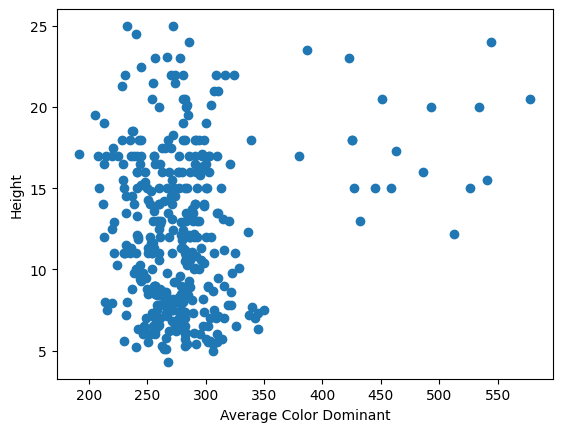

In [77]:
# df_avg_color_dominant_notna = df[df['avg_color_dominant'].notna()]
print(len(avg_color_dominant_nonans))
print(len(df[column]))
plt.scatter(
	avg_color_dominant_nonans, # x
    df[column][:-1], # y
    )

plt.xlabel('Average Color Dominant')
plt.ylabel(column)

plt.show()

# Depth images

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
depth_images = []
color_images = []
grayscale_images = []
unchanged_images = []
for file in os.listdir(path):
	if file.endswith(".png"):
		# Depth images
		print("Reading depth image: " + file)
		image = cv2.imread(os.path.join(path, file), cv2.IMREAD_ANYDEPTH)
		depth_images.append(image)

		# Normal images
		print("Reading color image: " + file)
		color_image = cv2.imread(os.path.join(path, file), cv2.IMREAD_COLOR)
		color_images.append(color_image)

		# Unchanged images
		print("Reading unchanged image: " + file)
		unchanged_image = cv2.imread(os.path.join(path, file), cv2.IMREAD_UNCHANGED)
		unchanged_images.append(unchanged_image)


		# Grayscale images
		print("Reading grayscale image: " + file)
		grayscale_image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
		grayscale_images.append(grayscale_image)

In [ ]:
images = unchanged_image[:2]

# Find the contours of the depth images
for index,image in enumerate(images):
	print("Finding contours of image " + str(index))
	# transform the depth image to a binary image
	# threshold the depth image
	threshold = 1000
	ret, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
	print("Threshold: " + str(threshold))
	# find the contours
	contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
	print("Number of contours: " + str(len(contours)))
	# draw the contours in red
	cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
	# display the image
	plt.imshow(image)
	plt.show()
	# cv2.waitKey(0)

In [ ]:
import imutils

image = color_images[0]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
thresh = thresh.copy()

thresh = 1000

# write the thresh image to disk
cv2.imwrite("thresh.png", thresh)


# OpenCV center of contour
# find contours in the thresholded image
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the contour and center of the shape on the image
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	# show the image
	# cv2.imshow("Image", image)
	# cv2.waitKey(0)
	plt.imshow(image)
	plt.show()
	break